In [1]:
!pip install mediapipe

In [2]:
!pip install opencv-python

In [3]:
!pip install tensorflow

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time


In [2]:
import mediapipe as mp

In [3]:

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
def draw_styled_landmarks(image,results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    

In [4]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [5]:
len(results.left_hand_landmarks.landmark)

21

In [6]:
len(results.right_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
results

In [7]:
draw_landmarks(frame, results)

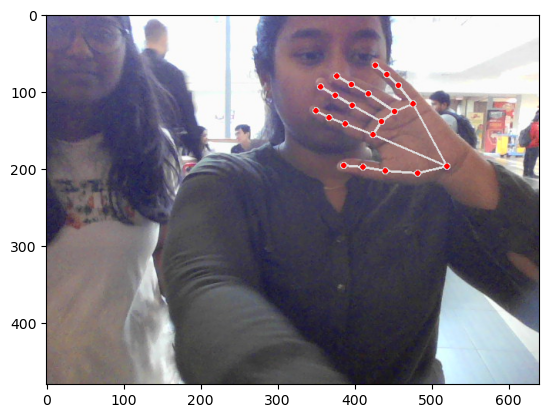

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
# extract key points
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [10]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [12]:
np.save('0',result_test)

In [13]:
np.load('0.npy')

array([ 8.12516093e-01,  4.11481619e-01,  1.99032911e-07,  7.53263295e-01,
        4.29626822e-01, -1.30392537e-02,  6.88898802e-01,  4.24069911e-01,
       -1.93361454e-02,  6.43012822e-01,  4.13528502e-01, -2.63977516e-02,
        6.04446828e-01,  4.08495426e-01, -3.32407951e-02,  6.62547112e-01,
        3.26495320e-01, -3.23287514e-03,  6.06794000e-01,  2.96189517e-01,
       -1.80578716e-02,  5.74467659e-01,  2.79451847e-01, -3.15336138e-02,
        5.47146440e-01,  2.61638403e-01, -4.16897982e-02,  6.79756403e-01,
        2.90686369e-01, -9.50629916e-03,  6.21075630e-01,  2.46748358e-01,
       -2.21819505e-02,  5.86432338e-01,  2.19851702e-01, -3.42592783e-02,
        5.57319462e-01,  1.96387663e-01, -4.31135595e-02,  7.07332730e-01,
        2.63586283e-01, -1.92327835e-02,  6.54305875e-01,  2.15715438e-01,
       -3.34779248e-02,  6.20250165e-01,  1.89606771e-01, -4.33321968e-02,
        5.89502990e-01,  1.68721691e-01, -5.02362251e-02,  7.44584501e-01,
        2.43180752e-01, -

In [14]:
result_test

array([ 8.12516093e-01,  4.11481619e-01,  1.99032911e-07,  7.53263295e-01,
        4.29626822e-01, -1.30392537e-02,  6.88898802e-01,  4.24069911e-01,
       -1.93361454e-02,  6.43012822e-01,  4.13528502e-01, -2.63977516e-02,
        6.04446828e-01,  4.08495426e-01, -3.32407951e-02,  6.62547112e-01,
        3.26495320e-01, -3.23287514e-03,  6.06794000e-01,  2.96189517e-01,
       -1.80578716e-02,  5.74467659e-01,  2.79451847e-01, -3.15336138e-02,
        5.47146440e-01,  2.61638403e-01, -4.16897982e-02,  6.79756403e-01,
        2.90686369e-01, -9.50629916e-03,  6.21075630e-01,  2.46748358e-01,
       -2.21819505e-02,  5.86432338e-01,  2.19851702e-01, -3.42592783e-02,
        5.57319462e-01,  1.96387663e-01, -4.31135595e-02,  7.07332730e-01,
        2.63586283e-01, -1.92327835e-02,  6.54305875e-01,  2.15715438e-01,
       -3.34779248e-02,  6.20250165e-01,  1.89606771e-01, -4.33321968e-02,
        5.89502990e-01,  1.68721691e-01, -5.02362251e-02,  7.44584501e-01,
        2.43180752e-01, -

In [15]:
21*3+21*3

126

In [16]:
extract_keypoints(results).shape

(126,)

# setup folders for collections

In [17]:
# path for exported data
DATA_PATH = os.path.join(r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\MP_Data')

actions=np.array(['Hello','i love you','what are you doing','no','all done','Thank you','yes','Thats it'])
#10 videos worth of data
no_sequences = 15
# 15 frames of length of each frame
sequence_length = 15
# 8*10*10

In [18]:

## 0 to 9



In [19]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
            

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'Hello': 0,
 'i love you': 1,
 'what are you doing': 2,
 'no': 3,
 'all done': 4,
 'Thank you': 5,
 'yes': 6,
 'Thats it': 7}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(120, 15, 126)

In [25]:
np.array(labels).shape

(120,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(120, 15, 126)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
y

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0,

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [31]:
y_test.shape

(24, 8)

In [32]:
y_train.shape

(96, 8)

In [33]:
X_test.shape

(24, 15, 126)

In [34]:
X_train.shape

(96, 15, 126)

In [35]:
# print and check
X_train

array([[[ 7.59499669e-01,  7.39796937e-01,  4.96366170e-07, ...,
          1.58726677e-01,  4.92866069e-01, -1.13034137e-01],
        [ 7.54911005e-01,  6.64202988e-01,  3.19191258e-07, ...,
          1.66548401e-01,  2.87133396e-01, -1.02012686e-01],
        [ 7.51703441e-01,  6.61104381e-01,  4.97844383e-07, ...,
          1.68161869e-01,  2.86296219e-01, -1.05578765e-01],
        ...,
        [ 7.50973165e-01,  6.68252170e-01,  5.05953722e-07, ...,
          1.66726887e-01,  2.91250944e-01, -1.05504282e-01],
        [ 7.53077507e-01,  6.66398764e-01,  5.06602078e-07, ...,
          1.67381808e-01,  2.91158915e-01, -1.06175303e-01],
        [ 7.51764238e-01,  6.66522443e-01,  5.06011020e-07, ...,
          1.67229205e-01,  2.91423678e-01, -1.05916411e-01]],

       [[ 6.19691253e-01,  5.30041456e-01, -8.50215969e-08, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.52375758e-01,  5.78730762e-01, -1.54382690e-07, ...,
          0.00000000e+00,  0.00000000e

In [36]:
from tensorflow.keras.models import Sequential # sequential neural network
from tensorflow.keras.layers import LSTM, Dense 
from tensorflow.keras.callbacks import TensorBoard

In [37]:
log_dir = os.path.join(r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
X.shape

(120, 15, 126)

In [40]:
[actions.shape[0]]

[8]

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback])

Epoch 1/250
3/3 [==============================] - 7s 35ms/step - loss: 2.0792 - categorical_accuracy: 0.0729
Epoch 2/250
3/3 [==============================] - 0s 29ms/step - loss: 2.0705 - categorical_accuracy: 0.2083
Epoch 3/250
3/3 [==============================] - 0s 31ms/step - loss: 2.0561 - categorical_accuracy: 0.2396
Epoch 4/250
3/3 [==============================] - 0s 28ms/step - loss: 2.0279 - categorical_accuracy: 0.2604
Epoch 5/250
3/3 [==============================] - 0s 30ms/step - loss: 1.9333 - categorical_accuracy: 0.2604
Epoch 6/250
3/3 [==============================] - 0s 30ms/step - loss: 1.9480 - categorical_accuracy: 0.2708
Epoch 7/250
3/3 [==============================] - 0s 29ms/step - loss: 1.8772 - categorical_accuracy: 0.2604
Epoch 8/250
3/3 [==============================] - 0s 29ms/step - loss: 1.7836 - categorical_accuracy: 0.2604
Epoch 9/250
3/3 [==============================] - 0s 28ms/step - loss: 1.6999 - categorical_accuracy: 0.2708
Epoch 10/2

3/3 [==============================] - 0s 37ms/step - loss: 0.2831 - categorical_accuracy: 0.9375
Epoch 75/250
3/3 [==============================] - 0s 27ms/step - loss: 0.3201 - categorical_accuracy: 0.9271
Epoch 76/250
3/3 [==============================] - 0s 33ms/step - loss: 0.2745 - categorical_accuracy: 0.9271
Epoch 77/250
3/3 [==============================] - 0s 24ms/step - loss: 0.1949 - categorical_accuracy: 0.9792
Epoch 78/250
3/3 [==============================] - 0s 36ms/step - loss: 0.1436 - categorical_accuracy: 0.9792
Epoch 79/250
3/3 [==============================] - 0s 31ms/step - loss: 0.0978 - categorical_accuracy: 0.9896
Epoch 80/250
3/3 [==============================] - 0s 37ms/step - loss: 0.0561 - categorical_accuracy: 1.0000
Epoch 81/250
3/3 [==============================] - 0s 38ms/step - loss: 0.0284 - categorical_accuracy: 1.0000
Epoch 82/250
3/3 [==============================] - 0s 30ms/step - loss: 0.0202 - categorical_accuracy: 1.0000
Epoch 83/250
3

3/3 [==============================] - 0s 28ms/step - loss: 8.1093e-05 - categorical_accuracy: 1.0000
Epoch 146/250
3/3 [==============================] - 0s 31ms/step - loss: 7.9279e-05 - categorical_accuracy: 1.0000
Epoch 147/250
3/3 [==============================] - 0s 30ms/step - loss: 7.6993e-05 - categorical_accuracy: 1.0000
Epoch 148/250
3/3 [==============================] - 0s 29ms/step - loss: 7.4905e-05 - categorical_accuracy: 1.0000
Epoch 149/250
3/3 [==============================] - 0s 30ms/step - loss: 7.3371e-05 - categorical_accuracy: 1.0000
Epoch 150/250
3/3 [==============================] - 0s 33ms/step - loss: 7.1547e-05 - categorical_accuracy: 1.0000
Epoch 151/250
3/3 [==============================] - 0s 36ms/step - loss: 7.0116e-05 - categorical_accuracy: 1.0000
Epoch 152/250
3/3 [==============================] - 0s 28ms/step - loss: 6.8081e-05 - categorical_accuracy: 1.0000
Epoch 153/250
3/3 [==============================] - 0s 30ms/step - loss: 6.6761e-05 -

3/3 [==============================] - 0s 34ms/step - loss: 2.0129e-05 - categorical_accuracy: 1.0000
Epoch 216/250
3/3 [==============================] - 0s 33ms/step - loss: 2.0000e-05 - categorical_accuracy: 1.0000
Epoch 217/250
3/3 [==============================] - 0s 31ms/step - loss: 1.9594e-05 - categorical_accuracy: 1.0000
Epoch 218/250
3/3 [==============================] - 0s 29ms/step - loss: 1.9200e-05 - categorical_accuracy: 1.0000
Epoch 219/250
3/3 [==============================] - 0s 33ms/step - loss: 1.8930e-05 - categorical_accuracy: 1.0000
Epoch 220/250
3/3 [==============================] - 0s 30ms/step - loss: 1.8564e-05 - categorical_accuracy: 1.0000
Epoch 221/250
3/3 [==============================] - 0s 29ms/step - loss: 1.8187e-05 - categorical_accuracy: 1.0000
Epoch 222/250
3/3 [==============================] - 0s 30ms/step - loss: 1.7933e-05 - categorical_accuracy: 1.0000
Epoch 223/250
3/3 [==============================] - 0s 33ms/step - loss: 1.7667e-05 -

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 15, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 203624 (795.41 KB)
Trainable params: 20362

# predictions

In [44]:
res = model.predict(X_test)

1/1 [==============================] - 1s 946ms/step


In [45]:
actions[np.argmax(res[1])]

'Thank you'

In [46]:
actions[np.argmax(y_test[1])]

'Thank you'

# save weights

In [47]:
model.save('action.h5')

C:\Users\karth\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
# del model

In [49]:
#model.load_weights('action.h5')

# evaluation

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
ytrue

[3, 5, 7, 3, 4, 4, 0, 2, 6, 2, 0, 5, 6, 7, 7, 6, 4, 7, 7, 5, 4, 4, 0, 1]

In [54]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[21,  0],
        [ 0,  3]],

       [[23,  0],
        [ 0,  1]],

       [[22,  0],
        [ 1,  1]],

       [[21,  1],
        [ 0,  2]],

       [[19,  0],
        [ 0,  5]],

       [[21,  0],
        [ 0,  3]],

       [[19,  2],
        [ 0,  3]],

       [[19,  0],
        [ 2,  3]]], dtype=int64)

In [55]:
accuracy_score(ytrue, yhat)

0.875

In [56]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 13ms/step


In [57]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [58]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[84,  0],
        [ 0, 12]],

       [[82,  0],
        [ 0, 14]],

       [[83,  0],
        [ 0, 13]],

       [[83,  0],
        [ 0, 13]],

       [[86,  0],
        [ 0, 10]],

       [[84,  0],
        [ 0, 12]],

       [[84,  0],
        [ 0, 12]],

       [[86,  0],
        [ 0, 10]]], dtype=int64)

In [59]:
accuracy_score(ytrue, yhat)

1.0

# Test in real Time

In [60]:
from scipy import stats

In [61]:
colors = [(245,117,16), (245,117,16), (245,117,16),(245,117,16),
         (245,117,16), (245,117,16),(245,117,16),(245,117,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [62]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [63]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5


In [64]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-15:]
        
        if len(sequence) == 15:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-15:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [============================

In [65]:
# 1. New detection variables

sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-15:]
        
        if len(sequence) == 15:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-15:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [66]:
cap.release()
cv2.destroyAllWindows()

# Working

In [ ]:
import pygame
import cv2
import numpy as np


# Initialize
pygame.init()

# Create Window/Display
width, height = 1280, 720
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Sign Language Recognition")

# Initialize Clock for FPS
fps = 30
clock = pygame.time.Clock()

fullscreen_edge_detection = False

#webcam
cap=cv2.VideoCapture(0)


# Colors
c = {"lightGreen": (189, 209, 197),
"Lightorange": (238, 204, 140),
"LightPink": (232, 178, 152),
"darkPink": (211, 162, 157),
"darkGreen": (158, 171, 162),
"darkGray": (128, 126, 126),
"LightGray": (204, 204, 204),
"darkBrown": (89, 61, 61),
"white": (255, 255, 255),
"black": (0, 0, 1) ,
"Yellow":(160,99,156)
}

#needed modifications
imgBackground = pygame.image.load(r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\\bg.jpeg').convert()
imgBackground = pygame.transform.scale(imgBackground, (width, height))
imgDesg = pygame.image.load(r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\\design.png').convert_alpha()
imgDesg = pygame.transform.scale(imgDesg, (width, height))
imgIcon1 = pygame.image.load (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\\icon.png').convert_alpha()
imgIcon2 = pygame.image.load (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\\og1.png').convert_alpha()
imgIcon3 = pygame.image.load (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\icon.png').convert_alpha()
imgIcon4 = pygame.image.load (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\\edgedetection1.png').convert_alpha()
imgIcon5 = pygame.image.load (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\\histogrameql1.png').convert_alpha()
imgIcon6 = pygame.image.load (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\\grayscale1.png').convert_alpha()
imgToggleOn = pygame.image.load (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\\tog_on.png').convert_alpha()
imgToggle0ff = pygame.image.load (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\\OIP.png').convert_alpha()


# List of WindowPads
pads =[{"no": 1, "color": c['lightGreen'], "text": "Original", "icon": imgIcon2},
       {"no": 2, "color": c['Lightorange'], "text": "Sign Recognition", "icon": imgIcon3},
       {"no": 3, "color": c['LightPink'], "text": "Edge Detection", "icon": imgIcon4},
        {"no": 4, "color": c['darkPink'], "text": "Histogram Equalization","icon": imgIcon5},
        {"no": 5, "color": c['Yellow'], "text": "Gray Scale","icon": imgIcon6}
        ]
def drawWindowPad (pos, color, text, icon):
    Xo,Yo,w,h = pos
    pygame.draw.rect (window, color, (Xo,Yo, w, 64),
                    border_top_left_radius=10, border_top_right_radius=10)
    pygame.draw.rect(window, c['white'], (Xo,Yo+64, w, h-87),
                    border_bottom_left_radius=10, border_bottom_right_radius=10)
    window.blit(icon,(Xo+20,Yo+12))
    font = pygame.font.Font (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\MarcellusSC-Regular.ttf',20)
    text = font. render (text, True, c['darkBrown' ])
    window.blit(text, (Xo+82, Yo+20))


def drawFilterPad():
    font=pygame.font.Font (r'C:\Users\karth\Downloads\sign-language-detection-main\sign-language-detection-main\SIGN\SIGN\MarcellusSC-Regular.ttf',16)        
    window.blit(imgToggle0ff, (15, 57))
    '''#1
    textDisp1 = font.render ("DIP tech 1", True, c["darkBrown"])
    window.blit(textDisp1, (106, 83+43)) 
    window.blit(imgToggleOn, (280, 77+45))
    # 2
    textDisp2 = font.render ("DIP tech 2", True, c["darkBrown"])
    window.blit(textDisp2, (106, 83+43*2)) 
    window.blit (imgToggleOn, (280, 77+45*2))
    # 3
    textDisp3 = font.render ("DIP tech 3", True, c["darkBrown"])
    window.blit(textDisp3, (106, 87+43*3)) 
    window.blit (imgToggleOn, (280, 77+45*3))
    # 4
    textDisp4 = font.render ("DIP tech 4", True, c["darkBrown"])
    window.blit(textDisp4, (106, 90+43*4)) 
    window.blit (imgToggleOn, (280, 77+45*4))
    # 5
    textDisp4 = font.render ("DIP tech 5", True, c["darkBrown"])
    window.blit(textDisp4, (106, 92+43*5)) 
    window.blit (imgToggleOn, (280, 77+45*5))'''
    # SLiders
    '''font = pygame. font. Font ('2.Resources/Marcellus-Regular.ttf', 25)
    for y in range (0, 3):
        h = 447 + y * 55
        sliderPos = 105 + 50 * y + 30
        pygame.draw.line(window, c["LightGray"], (105, h), (105 + 155, h), 5) 
        pygame.draw.line (window, c["darkGray"], (105, h), (sliderPos, h), 5) 
        pygame.draw.rect(window, c["darkGray"], (sliderPos, h - 15, 12, 30))
        textDisp = font.render (str(y * 50 + 30), True, c["darkBrown"])
        window.blit(textDisp, (286, h - 18))'''

def drawall():
    w, h = 312, 301
    gapW,gapH=72,25
    drawWindowPad ((484, 57, w, h), pads [0]['color'], pads [0]['text'], pads[0]['icon']) 
    drawWindowPad ((484+w+gapW, 57, w, h), pads [1]['color'], pads [1]['text'], pads[1]['icon']) 
    drawWindowPad ((484, 57+h+gapH, w, h), pads [2]['color'], pads [2]['text'], pads[2]['icon']) 
    drawWindowPad ((484+w+gapW, 57+gapH+h, w, h), pads [3]['color'], pads [3]['text'], pads[3]['icon']) 
    drawWindowPad ((75, 57+gapH+h, w, h), pads [4]['color'], pads [4]['text'], pads[4]['icon']) 

    #window.blit(imgIcon1, (100, 100))
    drawFilterPad()
 
# Main Loop
start = True
while start:
    # Get Events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            start = False
            pygame.quit()


    # Apply Logic
    window.blit(imgBackground, (0, 0))
    imgDesg.set_alpha(0)
    window.blit(imgDesg, (0, 0))
    drawall()
    
    #screen 1


    
    #screen 2
    # OpenCV
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            # Read feed
            ret, frame = cap.read()
            
            imgRGB1 = cv2.flip(frame, 1)
            imgRGB1 = cv2.cvtColor(imgRGB1, cv2.COLOR_BGR2RGB)
            imgRGB1 = np.rot90(imgRGB1)
            webcam_surface = pygame.surfarray.make_surface(imgRGB1)
            webcam_surface = pygame.transform.scale(webcam_surface, (310, 200))
            window.blit(webcam_surface, (484, 121))
            clock.tick(fps)
            
            #screen 3
            # Perform histogram equalization on the frame
            # Split the frame into its RGB channels
            b, g, r = cv2.split(frame)
        
            # Apply histogram equalization to each RGB channel
            b_equalized = cv2.equalizeHist(b)
            g_equalized = cv2.equalizeHist(g)
            r_equalized = cv2.equalizeHist(r)

            # Merge the equalized channels back into a colored frame
            equalized_frame = cv2.merge((b_equalized, g_equalized, r_equalized))

            
            # Display processed frame on screen 3
            processed_surface = pygame.surfarray.make_surface(np.rot90(equalized_frame))
            processed_surface = pygame.transform.scale(processed_surface, (310, 200))
            window.blit(processed_surface, (870, 450))
            
            
            # Black and white DIP technique
            bw_frame = cv2.cvtColor(equalized_frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            bw_frame_rgb = cv2.cvtColor(bw_frame, cv2.COLOR_GRAY2RGB)  # Convert to RGB format

            # Display black and white DIP result
            bw_surface = pygame.surfarray.make_surface(np.rot90(bw_frame_rgb))
            bw_surface = pygame.transform.scale(bw_surface, (310, 200))
            window.blit(bw_surface, (75, 450))  # Display at position (75, 450)
            
            # Edge detection
            edges = cv2.Canny(frame, 100, 200)  # Apply Canny edge detection
            edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)  # Convert to RGB format

            # Display edge detection result
            edges_surface = pygame.surfarray.make_surface(np.rot90(edges_rgb))
            edges_surface = pygame.transform.scale(edges_surface, (310, 200))
            window.blit(edges_surface, (484, 450))  # Display at position (484, 383)
            
            mouse_pos = pygame.mouse.get_pos()
            if (484 <= mouse_pos[0] <= 484 + 310 and 450 <= mouse_pos[1] <= 450 + 200):
                if event.type == pygame.MOUSEBUTTONDOWN:
                    if event.button == 1:  # Left mouse button
                    # Toggle fullscreen mode for the edge detection result
                        if fullscreen_edge_detection:
                            pygame.display.set_mode((width, height))
                            fullscreen_edge_detection = False
                        else:
                            pygame.display.set_mode((width, height), pygame.FULLSCREEN)
                            fullscreen_edge_detection = True
            
            
            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            print(results)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-15:]

            if len(sequence) == 15:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))

                # Viz logic
                if np.unique(predictions[-15:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold:
                        if len(sentence) > 0:
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)

            cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Flip image horizontally to correct the mirror effect
            image = cv2.flip(image, 1)

            imgRGB = np.rot90(image)
            webcam_surface = pygame.surfarray.make_surface(imgRGB)

            # Adjust the position and size of the webcam feed surface to fit the designated area
            webcam_surface = pygame.transform.scale(webcam_surface, (310, 200))  # Adjust dimensions as needed

            # Blit the webcam feed onto the designated area
            window.blit(webcam_surface, (870, 121))  # Adjust coordinates as needed

            # Update Display
            pygame.display.update()

            # Set FPS
            clock.tick(fps)

            # Break gracefully
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    start = False
                    pygame.quit()
                    cap.release()
                    cv2.destroyAllWindows()  # Correct typo here
                    break  # Indent properly to be within the event handling loop
            if not start:
                break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
Thats it
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Thats it
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==

1/1 [==============================] - 0s 49ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
i love you
<class 'mediap

1/1 [==============================] - 0s 35ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0

1/1 [==============================] - 0s 33ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 41ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 42ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Thats it
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
yes
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Thats it
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
yes


1/1 [==============================] - 0s 36ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/s

1/1 [==============================] - 0s 54ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
i love you
<class 'mediapipe.python.solution_base.So

1/1 [==============================] - 0s 40ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
what are you doing
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Thats it
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
Thats it
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
Thank you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/s

1/1 [==============================] - 0s 32ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 43ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 37ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 54ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 39ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 52ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 58ms/step
no
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
no
<class 'mediapipe.python.solution_base.SolutionOu